<a href="https://colab.research.google.com/github/Arthur-Barreto/Machine-Vision/blob/main/VisComp_Class_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Class 3: Color Variations

## Preliminaries

Run the cell below to download the class pack.

In [85]:
import gdown

gdown.download(id='1IsPLYtuiL1jZZGmnYwNw5eDI9KqiZoGs')

!unzip -o '03.zip'
!rm '03.zip'

Downloading...
From: https://drive.google.com/uc?id=1IsPLYtuiL1jZZGmnYwNw5eDI9KqiZoGs
To: /content/03.zip
100%|██████████| 194k/194k [00:00<00:00, 57.1MB/s]

Archive:  03.zip
  inflating: basement.png            
  inflating: dark.png                
  inflating: insper.png              
  inflating: light.png               
  inflating: sdx.py                  
  inflating: sudoku.jpg              


Run the cell below to import the class modules.

If you get import warnings, try using **Ctrl+m .** (notice there is a dot there) to restart the kernel.

In [86]:
import cv2 as cv
import numpy as np

from sdx import *

## Part 1: decoloring

When OpenCV reads a color image, the NumPy array is actually three-dimensional: the first dimension is the height, the second dimension is the width, and the third dimension is the number of color channels.

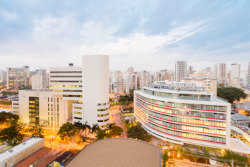

(167, 250, 3)

In [87]:
image = cv.imread('insper.png')

cv_imshow(image)

image.shape

By default, color images are in the BGR space: the first channel represents blue levels, the second channel represents green levels, and the third channel represents red levels. We can call the `cv.split` function to obtain each channel as a gray level image.

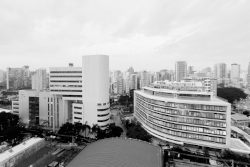

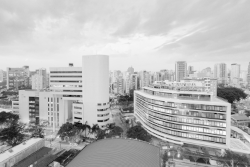

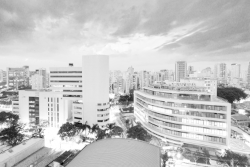

In [88]:
b, g, r = cv.split(image)

cv_imshow(b)
cv_imshow(g)
cv_imshow(r)

A possible approach to convert the original colors to gray levels is to take the average of the channels.

For efficiency, we will do this with standard NumPy arithmetic instead of loops.

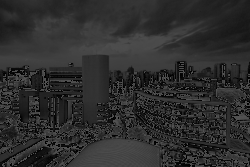

In [89]:
gray = (b + g + r) / 3

cv_imshow(gray)

### Challenge

Something clearly went wrong in the attempt above: there are weird artifacts all over the image.

Try to figure out what was the problem and replace the code below with a fixed version.

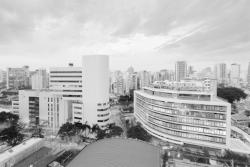

In [90]:
# gray = np.mean([b,g,r], axis = 0)

# or you can use

gray = b/3 + g/3 + r/3

# date has 8 bits, if we add first, it can have overflow

cv_imshow(gray)

## Part 2: brightness

Let's suppose we received two gray level images that have been degraded: one in which the pixels are lighter than in the original, and one in which the pixels are darker than in the original.

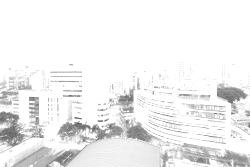

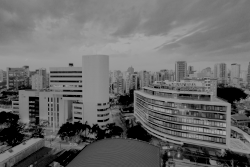

In [91]:
light = cv.imread('light.png')
dark = cv.imread('dark.png')

cv_imshow(light)
cv_imshow(dark)

### Challenge

Try to adjust the brightness of both images.

**Extra:** do not use loops.

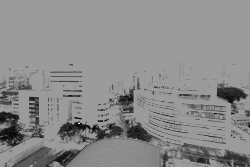

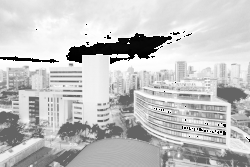

In [92]:
adjusted_light = np.maximum(light - 100, 0)

adjusted_dark = np.minimum(dark + 100, 255)

cv_imshow(adjusted_light)
cv_imshow(adjusted_dark)

## Part 3: contrast

To avoid writing extra code whenever we need to force the values into the `0`-`255` interval, we can convert the array to `float`.

The `cv_imshow` function automatically truncates negative values to `0` and large values to `255`.

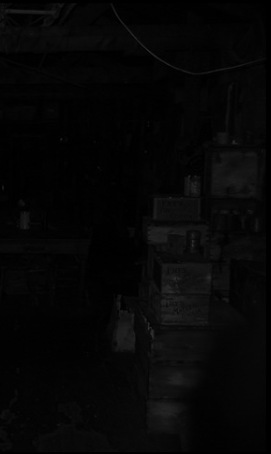

In [93]:
basement = cv.imread('basement.png').astype(float)

cv_imshow(basement)

This image is very dark, but increasing its brightness does not work very well.

We can distinguish more details, but the image as a whole looks flat and washed out.

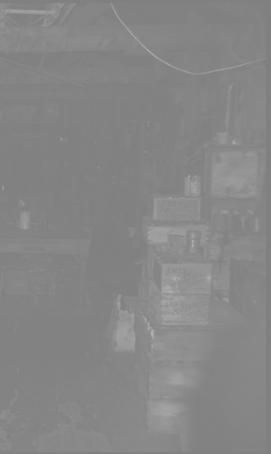

In [94]:
cv_imshow(basement + 128)

### Challenge

Try to adjust the contrast of the image.

**Extra:** achieve the best contrast that is theoretically possible.

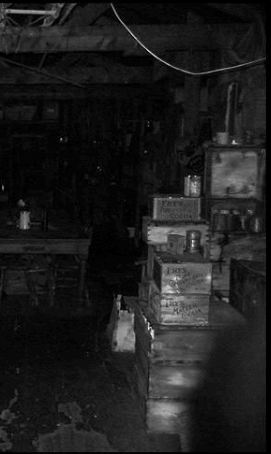

In [95]:
max_brightness = np.max(basement)
min_brightness = np.min(basement)
media_brightness = np.mean(basement)

delta = max_brightness - min_brightness

adjusted_basement = 255 * ((basement - min_brightness)/delta)
# first adjust the min value, subtracting. then, make divison for the highest value (so you have and number betwheen 0 and 1)
# finally, multiply for the max value of the scale, 255

cv_imshow(adjusted_basement)

## Part 4: thresholding

The image below is basically black-and-white, but, because it is a photo, it is presented as a gray level image.

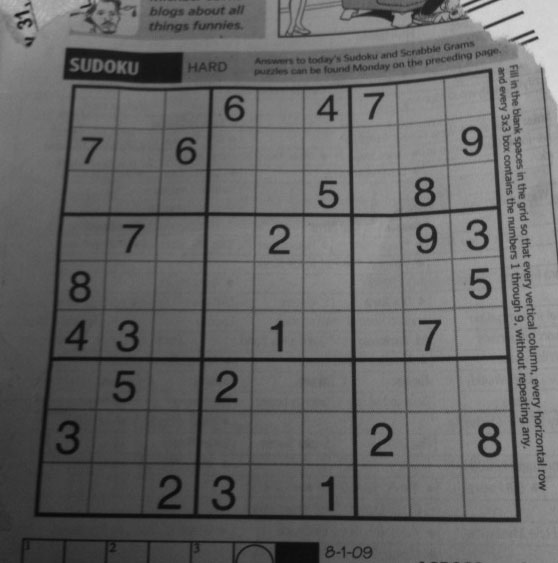

In [96]:
sudoku = cv.cvtColor(cv.imread('sudoku.jpg'), cv.COLOR_BGR2GRAY)

cv_imshow(sudoku)

### Challenge

Write a function to create *thresholded* version of the image. That is:

* if the original pixel is below 127, the thresholded pixel is 0;

* otherwise, the thresholded pixel is 255.

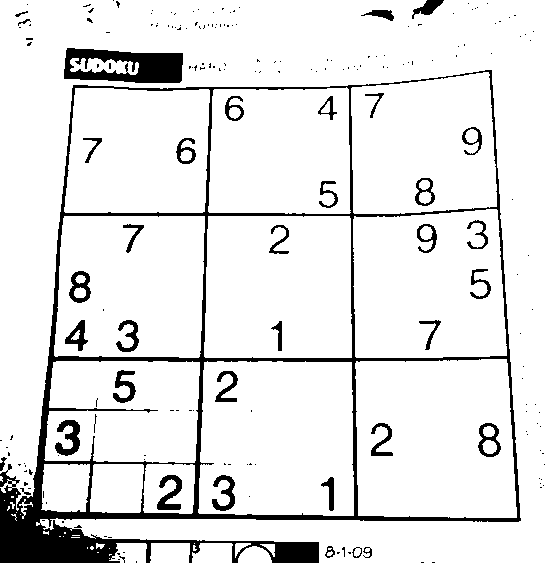

In [97]:
# def threshold(image):
#     height, width = image.shape

#     image_copy = image.copy()
#     image_copy[image<127] = 0
#     image_copy[image>=127] = 255

#     return image_copy

#  using mean value
def threshold(image):
    height, width = image.shape

    image_copy = image.copy()

    min = np.min(image_copy)
    max = np.max(image_copy)
    delta = max - min

    image_copy = 255 * ((image_copy - min) / delta)

    image_copy[image < 55] = 0
    image_copy[image >= 55] = 255

    return image_copy

cv_imshow(threshold(sudoku))

Compare your result with the results below.

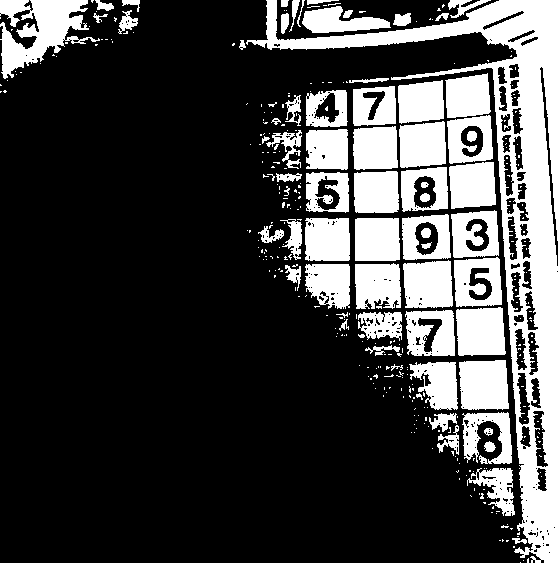

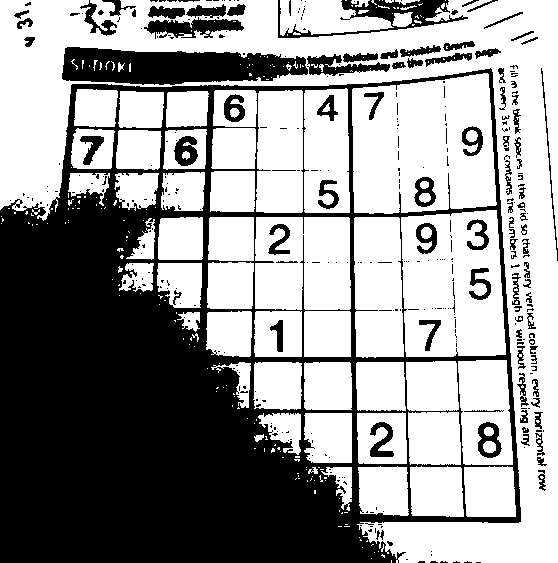

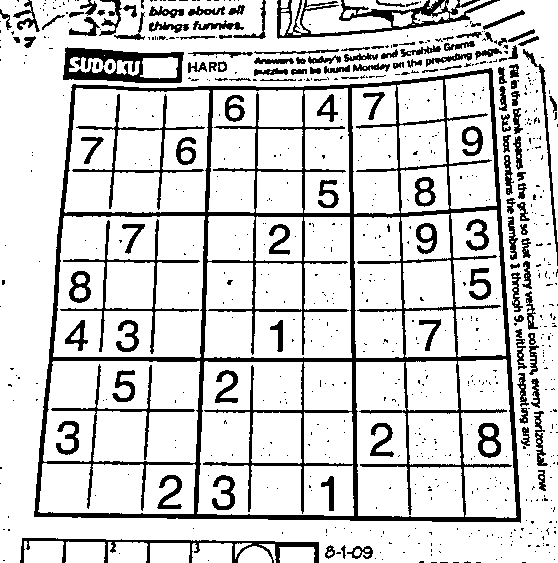

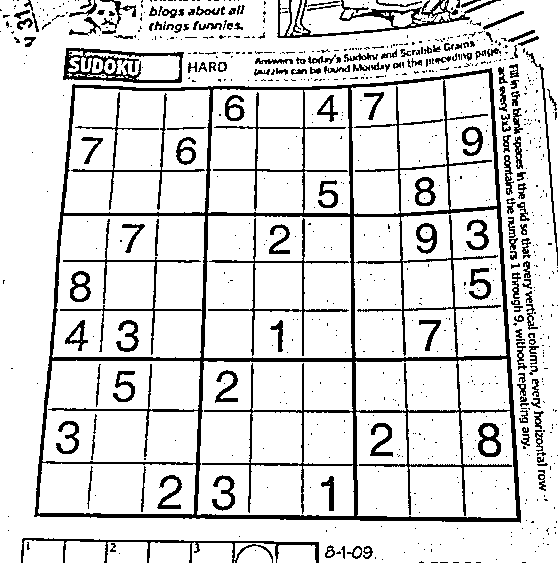

In [98]:
cv_imshow(cv.threshold(sudoku, 127, 255, cv.THRESH_BINARY)[1])
cv_imshow(cv.threshold(sudoku, 127, 255, cv.THRESH_OTSU)[1])
cv_imshow(cv.adaptiveThreshold(sudoku, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 5))
cv_imshow(cv.adaptiveThreshold(sudoku, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 5))

## Appendix: region of interest

Sometimes, we want to analyse or modify just a part of an image. More specifically, we are interested in a "sub-image" defined by a specific "window" of the original image. In image processing terminology, we say that this a **region of interest (ROI)**.

Since OpenCV images are NumPy arrays, we can easily obtain regions of interest via slicing, as in the example below.

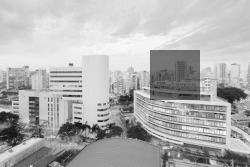

In [99]:
roi = gray[50:100, 150:200]

roi[:] = roi / 2

cv_imshow(gray)

### Question:

Why it was necessary to use `roi[:] =` instead of simply `roi =`?

 is necessary when you want to modify the elements of the original array that the slice or view is pointing to, whereas using roi = would reassign the variable to a new array, losing the connection to the original data and potentially leading to unexpected behavior.

### Challenge:

I don't know if you noticed, but there is an interesting detail hidden in the basement image.

Find this detail and consider it your ROI. Try to enhance the contrast of this ROI.

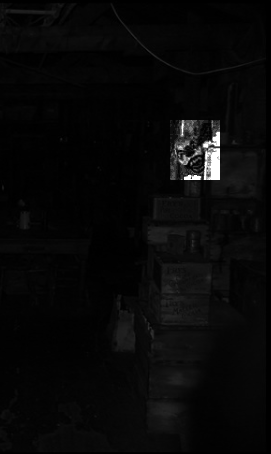

In [100]:
roi = basement[120:180, 170:220]

max_pixel = np.max(roi)
min_pixel = np.min(roi)
delta = max_pixel - min_pixel
contrast = ((roi-min_pixel)/delta)*255
roi[:] = (roi / 2)*contrast
adjusted_basement = basement

cv_imshow(adjusted_basement)

You can click on the toc.png tab to the left to browse by section.